In [1]:
import pandas as pd
import os
os.chdir(r"C:\Users\Gilseung\Google 드라이브\작업\온라인 강의 머신러닝 성능 향상을 위한 데이터 탐색과 전처리 심화\데이터\실습 데이터 - #1")

In [2]:
df = pd.read_csv("판매실적통합본.csv", engine = "python")
df.head()

,년도(year),월(month),분기(4),일자(day),주차별 편중도,출하일,대리점,지역 구분,내수/수출 구분,제품군,수량
0,2016,1,1분기,4,상,2016-01-04,대리점 6,국내,내수,제품 1,12
1,2016,1,1분기,4,상,2016-01-04,대리점 6,국내,내수,제품 1,4
2,2016,1,1분기,4,상,2016-01-04,대리점 6,국내,내수,제품 1,1
3,2016,1,1분기,4,상,2016-01-04,대리점 6,국내,내수,제품 5,122
4,2016,1,1분기,4,상,2016-01-04,대리점 6,국내,내수,제품 1,20


In [3]:
# 제품군별 수량합계 계산
grouped_df = df.groupby(['제품군'], as_index = False)['수량'].sum()

In [4]:
grouped_df

,제품군,수량
0,제품 1,2690307
1,제품 2,4223384
2,제품 3,531946
3,제품 4,277193
4,제품 5,126323
5,제품 6,262774


In [5]:
grouped_df.sort_values(by = '수량')['수량']

4     126323
5     262774
3     277193
2     531946
0    2690307
1    4223384
Name: 수량, dtype: int64

In [6]:
# 기타 행 추가
other_row = pd.DataFrame({"제품군":['기타'], 
                          '수량':[grouped_df.sort_values(by = '수량')['수량'].iloc[:4].sum()]})

grouped_df = pd.concat([grouped_df, other_row], axis = 0, ignore_index = True)
grouped_df = grouped_df.sort_values(by = '수량', ascending = False).iloc[:3]
grouped_df

,제품군,수량
1,제품 2,4223384
0,제품 1,2690307
6,기타,1198236


In [7]:
# 그래프 기본 설정
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline
plt.rcParams["font.family"] = 'Malgun Gothic'
plt.rcParams["font.size"] = 15
plt.rcParams["figure.figsize"] = (10, 8)

([<matplotlib.patches.Wedge at 0x12c0ec16d68>,
 [Text(-0.019438006431517805, 0.29936961085916564, '제품 2'),
  Text(-0.11660851500795197, -0.27640993872804254, '제품 1'),
  Text(0.2682736687188585, -0.13427300053295957, '기타')],
 [Text(-0.03887601286303561, 0.5987392217183313, '52.1%'),
  Text(-0.23321703001590394, -0.5528198774560851, '33.2%'),
  Text(0.536547337437717, -0.26854600106591914, '14.8%')])

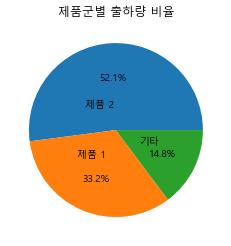

In [11]:
# 제품군별 출하량 합계 계산
plt.title("제품군별 출하량 비율")

plt.pie(x = grouped_df['수량'],
        labels = grouped_df['제품군'],
       labeldistance = 0.3,
       autopct = '%1.1f%%')